In [1]:
from utils_ConConCor import *
from utils_SABIO import *
from utils_nlp import *
import swifter


from tqdm import tqdm
tqdm.pandas()
import requests

import matplotlib.pyplot as plt

from collections import Counter

2022-09-06 22:15:23.021055: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 22:15:23.021084: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-06 22:15:25.238170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-06 22:15:25.238209: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-06 22:15:25.238230: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (valentin-hp): /proc/driver/nvidia/version does not exist


In [4]:
ccc = get_CCC_DF()
ccc_terms = ccc.target.unique()

nmvw = get_NMvW_DF().sort_index()
nmvw["Segmented"] = pd.read_csv("nmvw_segmented2.csv").set_index("ID").Texts.fillna("")

---
## spaCy

In [ ]:
def segment(txt):
    return [w for w in nlp(txt)]

def get_lemmata(txt):
    return [t.lemma_ for t in nlp(txt)]

spacy_outputs = nmvw.Texts.swifter.apply(segment)
spacy_outputs = spacy_outputs.apply(lambda ls: [w for w in ls if w.strip()])
spacy_outputs.to_csv("nmvw_segmented.csv", index=True, header=True)

In [ ]:
# lemmata = nmvw.Texts.swifter.apply(get_lemmata)
# lemmata = lemmata.apply(lambda ls: [w for w in ls if w.strip()])
# lemmata.to_csv("nmvw_lemmata.csv", index=True, header=True)

In [ ]:
# def parse_list(ls_str):
#     try:
#         return [x.strip() 
#             for x in ls_str[1:-1].split(",")
#             if x.strip()]
#     except AttributeError:
#         print(ls_str)
#         return []

# segmented = s.progress_apply(parse_list)
# segmented = segmented.str.join(" ")
# segmented.to_csv("nmvw_segmented2.csv", index=True, header=True)

---
## Search

In [ ]:
found, forms = find_lemmata(ccc_terms, nmvw.Segmented,
                    only_whole_words=True, return_forms=True)

In [ ]:
found_all, forms = find_lemmata(ccc_terms, nmvw.Segmented,
                    only_whole_words=False, return_forms=True)

In [ ]:
found.apply(len).sum(), found_all.apply(len).sum()

In [ ]:
forms

---
# NMvW Descriptive Stats & Plots

In [5]:
found, forms = find_lemmata(ccc_terms, nmvw.Segmented,
                     only_whole_words=False, return_forms=True)

getting wordforms from INT (internet up?): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:01<00:00,  1.47it/s]


Pandas Apply:   0%|          | 0/146694 [00:00<?, ?it/s]

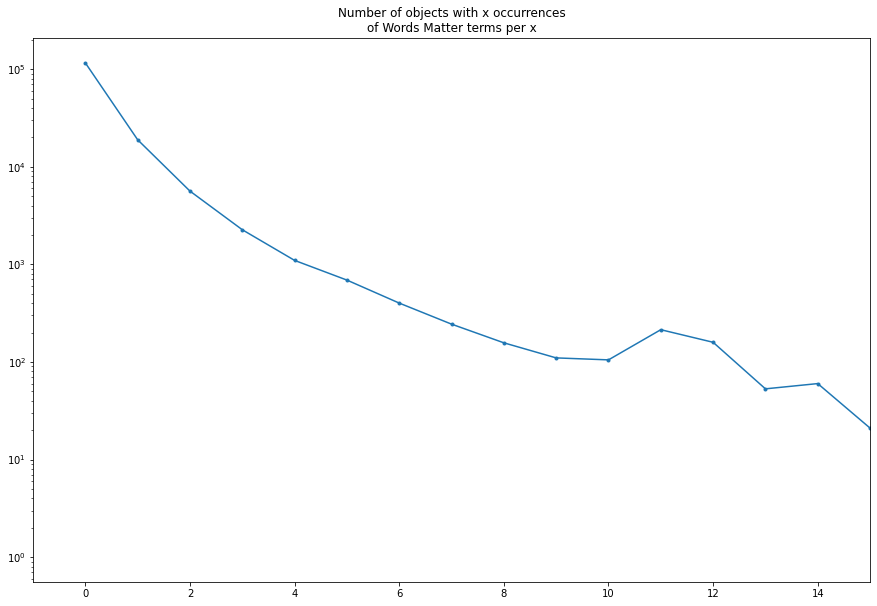

In [6]:
len_counts = Counter(found.apply(len))

ys = [c for i, c in sorted(len_counts.items())]

plt.figure(figsize=(15, 10))
plt.plot(ys, ".-")
plt.yscale("log")
plt.xlim((-1, 15))
_=plt.title("Number of objects with x occurrences\n" 
             "of Words Matter terms per x")

In [7]:
word_counts = Counter(w for txt in nmvw.Segmented for w in txt.split())

rs, fs = list(zip(*[(r, f) for r, (w, f) in enumerate(word_counts.most_common(), 1)]))

ccc_zipf = [(r, f, w) for r, (w, f) in enumerate(word_counts.most_common(), 1)
                           if w in forms]

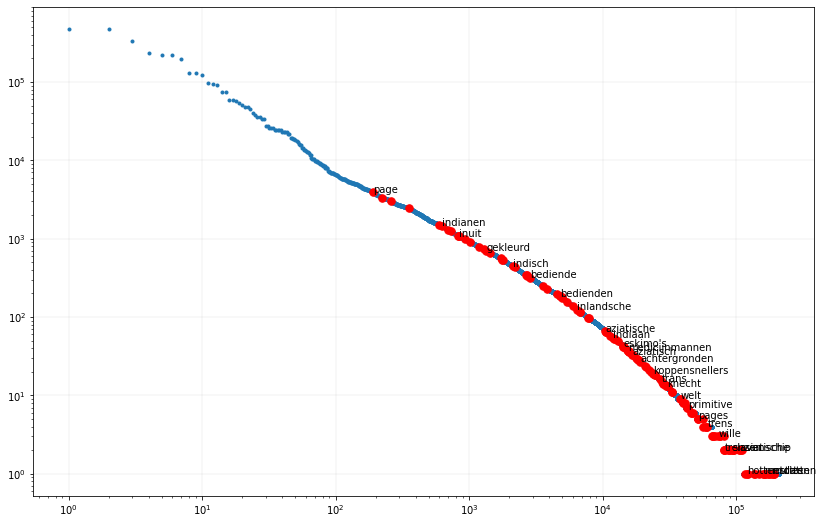

In [10]:
plt.figure(figsize=(14, 9))
plt.plot(rs, fs, ".")

for i, (ccc_r, ccc_f, ccc_w) in enumerate(ccc_zipf):
    plt.plot(ccc_r, ccc_f, ".", c="r", ms=15)
    if i % 5 == 0:
        plt.annotate(ccc_w, (ccc_r, ccc_f))
    
plt.xscale("log"); plt.yscale("log")
plt.grid(visible=True, color='grey', alpha=0.5, linewidth=0.2)

24 4997


Text(0, 0.5, 'document frequency')

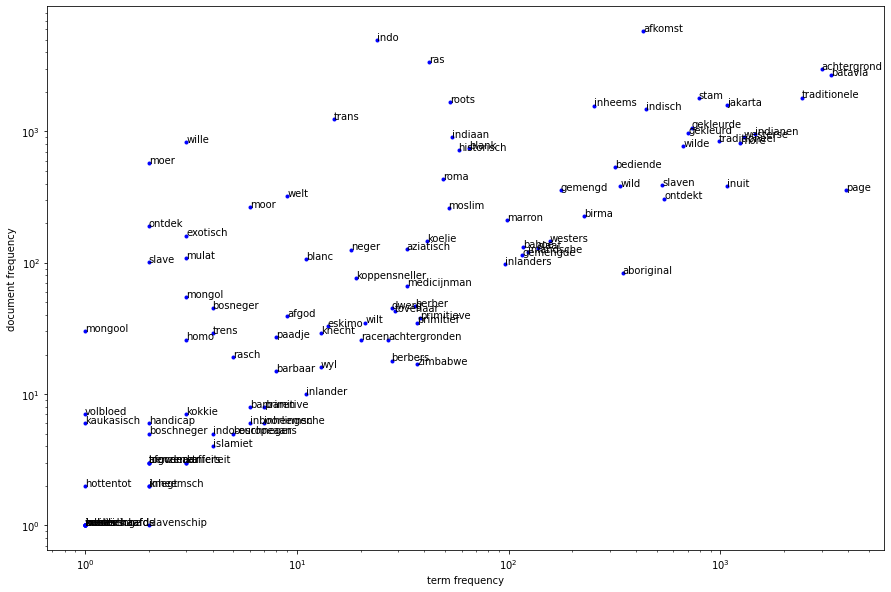

In [9]:
plt.figure(figsize=(15, 10))
for ccc_r, ccc_f, ccc_w in ccc_zipf:
    doc_f = found.apply(lambda ls: ccc_w in ls).sum()
    
    if ccc_w == "indo":
        print(ccc_f, doc_f)
    plt.plot(ccc_f, doc_f, ".", c="b")
    plt.annotate(ccc_w, (ccc_f, doc_f))
    
plt.xscale("log")
plt.yscale("log")

plt.xlabel("term frequency")
plt.ylabel("document frequency")